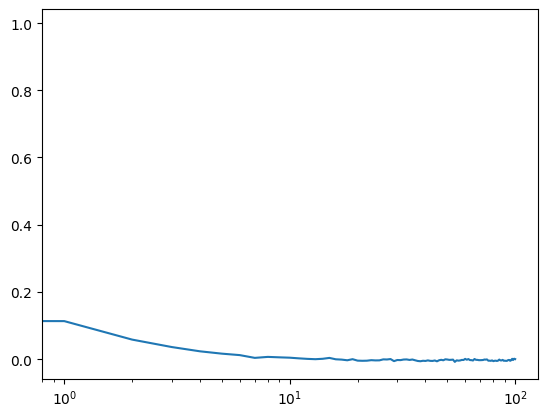

In [202]:
#| code-fold: true
import warnings
warnings.filterwarnings("ignore")


import os
os.chdir("/project/persistent-exclusion-process")

import numpy as np
import matplotlib.pyplot as plt
import h5py

from src.utils import get_ds_iters
from src.plot_utils import get_plot_configs

def overlap(traj,i,j):
    N = np.size(np.where(traj[i] > 0)[0]) # Number of particles (rho*Nx*Ny)
    return ((traj[i]>0)*(traj[j]>0)).sum()/N

hf = h5py.File('no_roll_data/dataset_tumble_0.034_0.25.h5')
data = [ hf[i][:] for i in np.array(sorted(list(hf.keys()), key=lambda x: int(x[5:])))]
data = np.array(data)

lags = np.arange(0, 100 + 1, 1)
acf =[]
# moving window size 10, 50 times
for i in range(0, 500, 10):
    a = [overlap(data,i,i+lag) for lag in lags]
    acf.append(a)

acf = np.asarray(acf).mean(axis=0) # mean across all lag
acf = acf-acf[-1]
acf/= acf.ptp() # divide by its range
plt.plot(lags,acf)
plt.xscale('log')

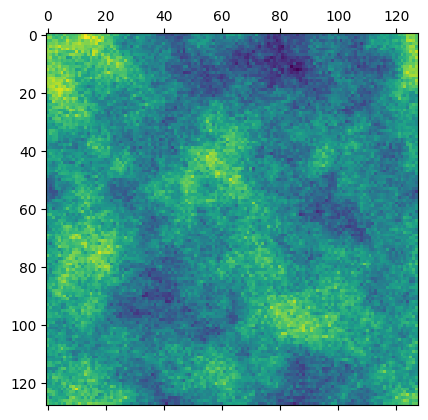

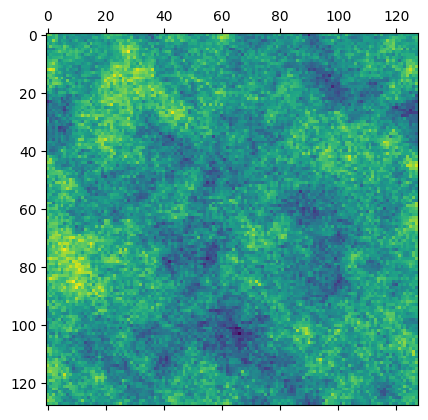

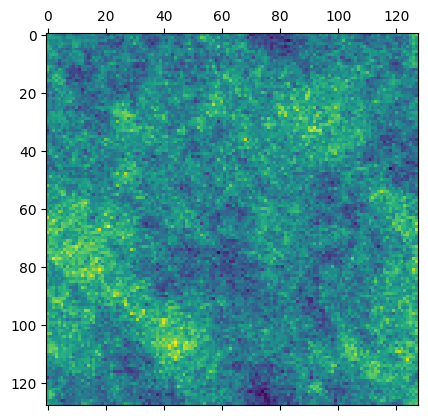

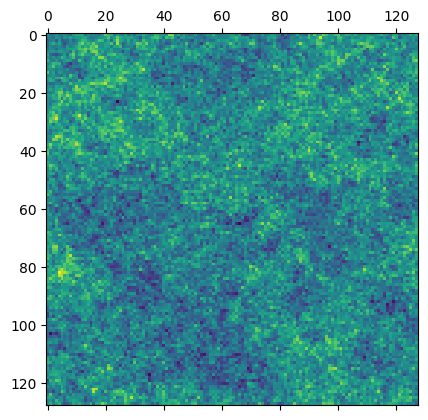

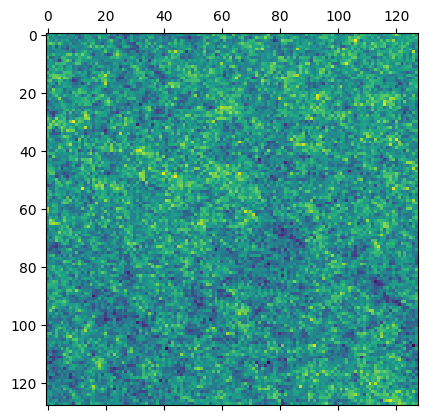

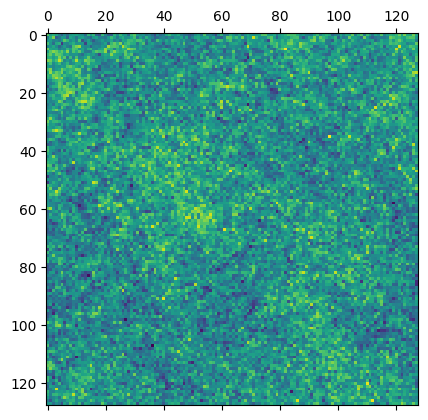

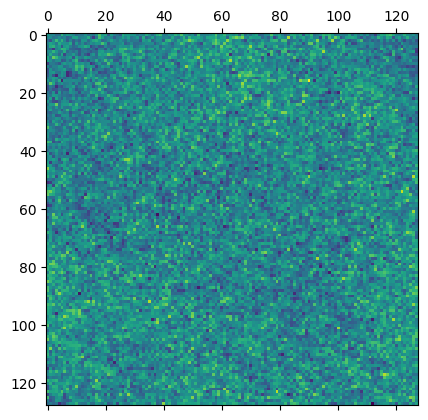

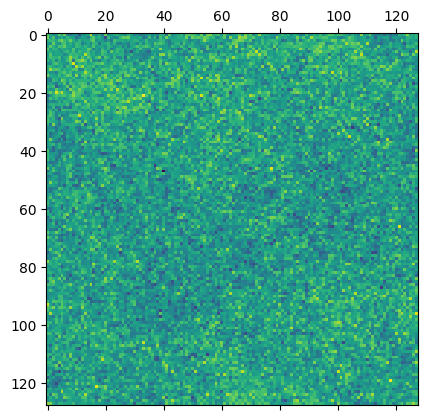

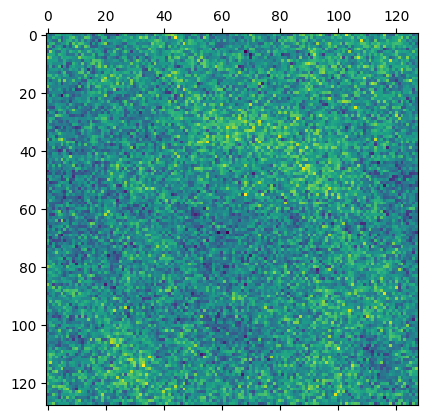

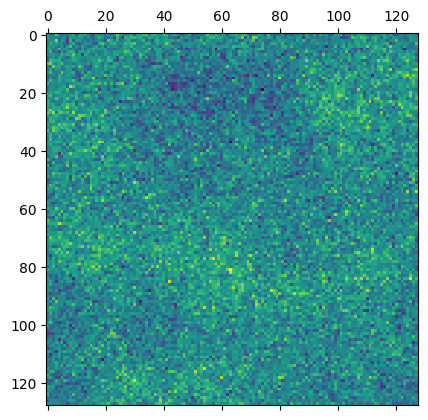

In [201]:
#| code-fold: true
tumbles = np.logspace(-6, -1, 10, base=2)
for i in tumbles:
    hf = h5py.File(f'no_roll_data/dataset_tumble_{i:.3f}_0.25.h5')
    data = [ hf[i][:] for i in np.array(sorted(list(hf.keys()), key=lambda x: int(x[5:])))]
    data = np.array(data)
    con = np.concatenate(
        (
            data,
            np.roll(data,(42,42),axis=(1,2)),
            np.roll(data,(120,120),axis=(1,2)),
        )
    )
    plt.matshow(np.mean(con,axis=0))